In [2]:
import numpy as np
import gym
from gym import spaces
import copy
from copy import copy
import matplotlib.pyplot as plt
import random

%matplotlib inline

class MAGridWorld(gym.Env):
    metadata = { 'render.modes' : ['human', 'rgb_array'] }
        
    def __init__(self, size, n_agents):
        self.size = size
        self._grid_size = (self.size, self.size)
        self.world = np.zeros((self._grid_size))
        self._timestep = None
        self._max_timestep = int(self.size*4)
        self.n_agents = n_agents
        self.dist = int((self.size-1)/(n_agents-1))
        self._step_cost = -0.1
        self.observation_space = spaces.Box(low=0, high=self.size, shape=(self.size, self.size))
        self.action_space = spaces.Discrete(5)
        
    def reset(self):
        self.agent_pos = []
        self.goal_pos = []
        self._timestep = 0
        self.done = [False for i in range(self.n_agents)]
        for i in range(self.n_agents):
            self.agent_pos.append([self.size-1, i*self.dist])
            self.goal_pos.append([0, i*self.dist])
        self.goal_pos.reverse()
        observation = self.agent_pos
        return observation
    
    def _compute_distance(self, x, y):
        dist = np.abs(x[0]-y[0]) + np.abs(x[1]-y[1])
        return dist
    
    def _is_inside_grid(self, pos):
        return (0 <= pos[0] < self._grid_size[0]) and (0 <= pos[1] < self._grid_size[1])

    def _is_collision(self, new_pos, agent):
        for i in range(self.n_agents):
            if i == agent:
                continue
            elif new_pos == self.agent_pos[i]:
                return True
            elif new_pos == self.goal_pos[i]:
                return True
        
    def step(self, actions):
        self._timestep += 1
        old_pos = self.agent_pos.copy()
        rewards = [0 for _ in range(self.n_agents)]       
        
        for i in range(self.n_agents):
            self.update_agent_pos(i, actions[i])
            old_dist = self._compute_distance(old_pos[i], self.goal_pos[i])
            new_dist = self._compute_distance(self.agent_pos[i], self.goal_pos[i])
            
            if new_dist < old_dist:
                rewards[i] = -0.1
            elif new_dist > old_dist:
                rewards[i] = -0.5

            elif (new_dist == old_dist) and not self.done[i]:
                rewards[i] = -0.5
            
            if (self.agent_pos[i] == self.goal_pos[i]):
                self.done[i] = True
                rewards[i] = 1
            else:
                self.done[i] = False
                    
               
        if self._timestep >= self._max_timestep:
            self.done = [True for i in range(self.n_agents)]
            
        observation = self.agent_pos
        info = {}
        return observation, rewards, self.done, info #all(done)
    
        
    def update_agent_pos(self, agent, action):
        next_pos = copy(self.agent_pos[agent])
        if action == 0: # Down
            next_pos[0] += 1
        elif action == 1: # Up
            next_pos[0] -= 1
        elif action == 2: # Right
            next_pos[1] += 1
        elif action == 3: # Left
            next_pos[1] -= 1
        elif action == 4: # No move
            pass
        else:
            raise Exception('Action is not valid')
            
        if self._is_inside_grid(next_pos) and not self._is_collision(next_pos, agent):
            self.agent_pos[agent] = next_pos
        else:
            pass
        
            
    def render(self):
        state = np.copy(self.world)
        for i in range(self.n_agents):
            state[tuple(self.agent_pos[i])] = 1 - (0.1 * i)
            state[tuple(self.goal_pos[i])] = 1 - (0.1 * i)
        return plt.imshow(state)

ModuleNotFoundError: No module named 'numpy'

In [2]:
config = {
    'N_AGENTS' : 8,
    'GRID_SIZE' : 8,
    'NUM_EPISODES': 200
}

state [[6, 0], [6, 1], [6, 2], [7, 3], [6, 4], [7, 4], [7, 6], [6, 7]]
reward [-0.1, -0.1, -0.1, -0.5, -0.1, -0.1, -0.5, -0.1]
done [False, False, False, False, False, False, False, False]


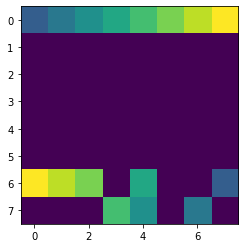

In [3]:
if __name__ == '__main__':
    n_agents = config['N_AGENTS']
    size = config['GRID_SIZE']
    env = MAGridWorld(size=size, n_agents=n_agents)
    env.reset()
    env.render()
    action_n = [1, 1, 1, 0, 1, 3, 4, 1]
    state, reward, done, _ = env.step(action_n)
    print('state', state)
    print('reward', reward)
    print('done', done)
    env.render()

state [[5, 0], [5, 1], [5, 2], [7, 3], [5, 4], [7, 4], [7, 6], [5, 7]]
reward [-0.1, -0.1, -0.1, -0.5, -0.1, -0.5, -0.5, -0.1]
done [False, False, False, False, False, False, False, False]


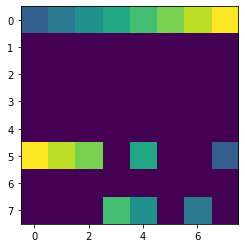

In [4]:
action_n = [1, 1, 1, 0, 1, 3, 4, 1]
state, reward, done, _ = env.step(action_n)
print('state', state)
print('reward', reward)
print('done', done)
env.render()

[3, 2, 0, 0, 3, 3, 0, 3]
state [[7, 0], [7, 1], [7, 2], [7, 3], [7, 4], [7, 5], [7, 6], [7, 7]]
reward [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5]
done [False, False, False, False, False, False, False, False]
[3, 2, 1, 3, 2, 2, 1, 2]
state [[7, 0], [7, 1], [6, 2], [7, 2], [7, 4], [7, 5], [6, 6], [7, 7]]
reward [-0.5, -0.5, -0.1, -0.5, -0.5, -0.5, -0.1, -0.5]
done [False, False, False, False, False, False, False, False]
[2, 0, 1, 3, 3, 2, 3, 4]
state [[7, 0], [7, 1], [5, 2], [7, 2], [7, 3], [7, 6], [6, 5], [7, 7]]
reward [-0.5, -0.5, -0.1, -0.5, -0.1, -0.5, -0.1, -0.5]
done [False, False, False, False, False, False, False, False]
[2, 1, 4, 1, 4, 3, 1, 1]
state [[7, 0], [6, 1], [5, 2], [6, 2], [7, 3], [7, 5], [5, 5], [6, 7]]
reward [-0.5, -0.1, -0.5, -0.1, -0.5, -0.1, -0.1, -0.1]
done [False, False, False, False, False, False, False, False]
[0, 4, 1, 1, 4, 4, 3, 4]
state [[7, 0], [6, 1], [4, 2], [5, 2], [7, 3], [7, 5], [5, 4], [6, 7]]
reward [-0.5, -0.5, -0.1, -0.1, -0.5, -0.5, -0.1

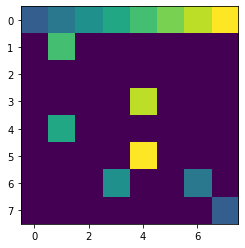

In [13]:
if __name__ == '__main__':
    n_agents = config['N_AGENTS']
    size = config['GRID_SIZE']
    env = MAGridWorld(size=size, n_agents=n_agents)
    env.reset()
    env.render()
    while(not all(env.done)):   
      action_n = [np.random.choice(env.action_space.n), np.random.choice(env.action_space.n), np.random.choice(env.action_space.n), np.random.choice(env.action_space.n), np.random.choice(env.action_space.n), np.random.choice(env.action_space.n), np.random.choice(env.action_space.n), np.random.choice(env.action_space.n)]
      state, reward, done, _ = env.step(action_n)
      print(action_n)
      print('state', state)
      print('reward', reward)
      print('done', done)
      env.render()
